In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys,inspect, string
import re
import csv
import importlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [36]:
import os
from scipy.io import wavfile
import scipy.signal
from src.dataset_getters import *
from src.plot_utils import *

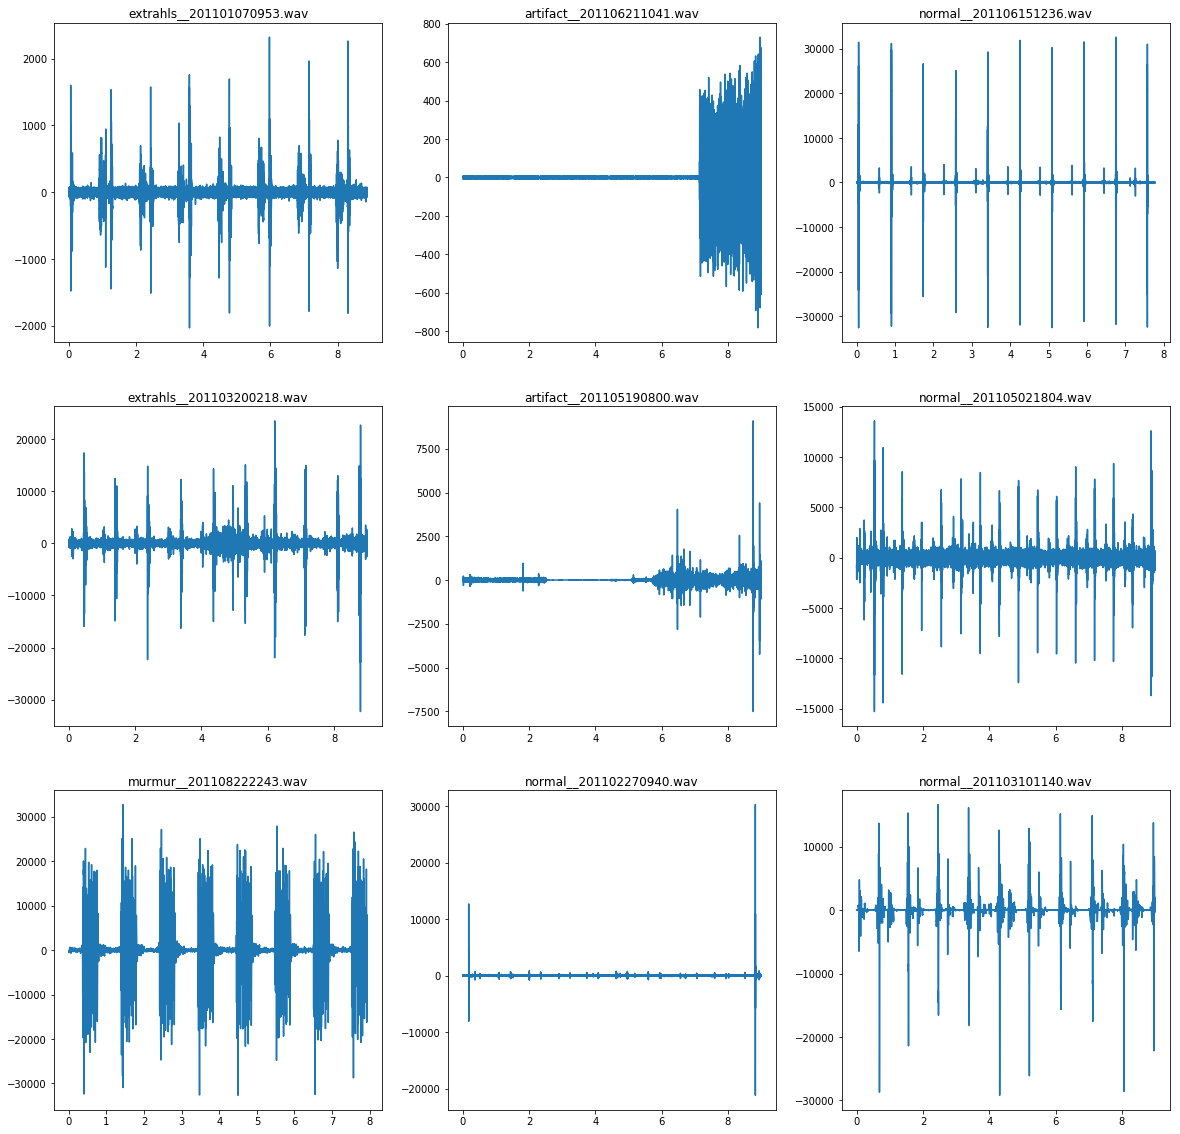

In [9]:
data_dir_path = get_kaggle_audio_dir_path('a')
paths = get_random_file_paths(9, data_dir_path)
plot_signals_on_square_grid(paths, 3, 20)

In [86]:
path = '/home/justyna/WORKSPACE/heartbeat_classification/data/raw/kaggle/set_a/normal__201103151912.wav'
path1 = '/home/justyna/WORKSPACE/heartbeat_classification/data/raw/kaggle/set_a/murmur__201102051443.wav'
path2 = '/home/justyna/WORKSPACE/heartbeat_classification/data/raw/kaggle/set_a/extrahls__201102241217.wav'

In [117]:
fs, signal = wavfile.read(path2)

In [118]:
desired_signal_length = int((len(signal) / fs) * 2000)
time = np.linspace(0, int((len(signal) / fs)), len(signal))
desired_signal_length

18000

In [119]:
decimated = scipy.signal.decimate(signal, 22)
downsampled = scipy.signal.resample(signal, desired_signal_length)

0


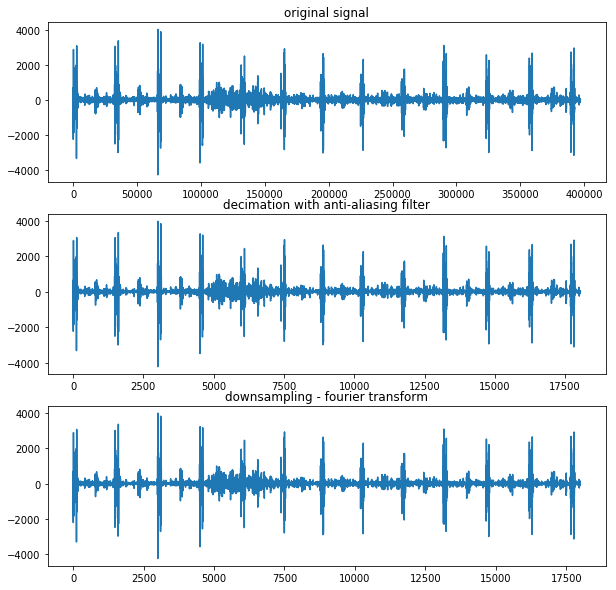

In [127]:
grid_size=2
figsize = 10
indices = list(product(list(range(grid_size)), repeat=2))
print(indices[0][0])
f, ax = plt.subplots(3, 1, figsize=(figsize, figsize))
ax[0].plot(signal)
ax[0].set_title('original signal')
ax[1].plot(decimated)
ax[1].set_title('decimation with anti-aliasing filter')
ax[2].plot(downsampled)
ax[2].set_title('downsampling - fourier transform')

plt.show()